# [4.10] 주성분 분석(Principal Component Analysis, PCA)

## 이론


> 고차원의 Data를 저차원의 Data로 차원을 축소하는 알고리즘


위의 말 그대로 고차원의 Data를 저차원으로 차원을 축소해서 시각화 등에 사용할 수 있다.


단, 이때 Data의 고유한 특성을 최대한 유지하기 위해서 Data의 분산을 최대한 유지하는 것을 목적으로 한다.


예를 들어 x축, y축으로 이루어진 2차원에 Data들이 존재한다고 하자. 이 Data들은 1차원인 직선 상으로 차원을 축소할 수 있을 것이다.


이러한 경우에서 몇 가지를 생각해보도록 하자.


먼저, x축으로 차원을 옮기는 경우를 생각해보자.


만약 2차원 상에 y좌표는 다르지만 x좌표가 같은 Data가 있다면, 이는 x축으로 차원을 떨어뜨리면 중첩될 것이다.


즉 y좌표는 다르지만 x좌표가 비슷하거나 같다면 x축으로 차원을 떨어뜨렸을 때 Data들간에 중첩이 생겨 구분이 어려워질 것이다.


이는 y축으로 차원을 옮기는 경우에도 동일한 상황이 생길 수 있다!


하지만 x축, y축도 아닌 어떠한 1차원 직선상으로 모든 점들을 떨어뜨린다면 어떨까?


'정사영' 개념을 떠올리는 것이 가장 쉬울 것으로 생각된다.


Data들간의 중첩을 최소한으로 할 수 있는 직선을 찾을 수만 있다면 이는 2차원의 Data들의 특성을 최대한 유지해서 1차원으로 차원을 축소했다고 볼 수 있다.


**주성분 분석(Principal Component Analysis, PCA) 알고리즘은 바로 그러한 라인을 찾아내는 알고리즘**이다!


2차원이 아닌 더 높은 차원으로 올라가면 이러한 것을 구하기란 쉽지 않을 것이다.


여기서 수학적인 개념이 도입된다.


수학적으로 'Data의 중첩이 적다'라는 말은 'Data의 분산이 크다'라는 말과 동일하다.


따라서 주성분 분석 알고리즘은 분산이 가장 큰 차원을 선택해서 차원을 축소하게 된다.


그리고 분산이 가장 큰 차원은 공분산 행렬(Covariance Matrix)에서 고유값(Eigenvalue)이 가장 큰 고유벡터(Eigenvector)이다.


예를 들어 Data가 5차원이고 이를 2차원으로 차원을 축소하고 싶다고 가정해보자.


그렇다면 주성분 분석 알고리즘은 5차원 Data의 공분산 행렬에서 Eigenvalue가 큰 순서대로 나열한 후, 상위 2개의 Eigenvector를 축으로 2차원을 구성하여 Data의 차원을 축소하게 된다.

## 실습) 식습관 Data를 차원축소시켜서 시각화하기

### Data 생성


아래와 같이 총 6개의 Column을 가진 Dataframe을 생성하였다.


column 순서대로 '칼로리', '아침', '점심', '저녁', '운동 횟수', '체형'을 의미한다.

In [1]:
import pandas as pd

df = pd.DataFrame(columns = ['calory', 'breakfast', 'lunch', 'dinner',
                            'exercise', 'body_shape'])

In [2]:
df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

In [3]:
df.head(10)

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


### Data 전처리


'body_shape' column을 제외한 나머지 Data 특징으로 'X'라는 Dataframe을 생성하였다.


그리고 'body_shape' column은 'Y'라는 변수에 Dataframe으로 따로 저장하였다.

In [4]:
X = df[['calory', 'breakfast', 'lunch', 'dinner', 'exercise']]
Y = df[['body_shape']]

In [5]:
X.head()

,calory,breakfast,lunch,dinner,exercise
0,1200,1,0,0,2
1,2800,1,1,1,1
2,3500,2,2,1,0
3,1400,0,1,0,3
4,5000,2,2,2,0


In [6]:
Y.head()

,body_shape
0,Skinny
1,Normal
2,Fat
3,Skinny
4,Fat


### Data 표준화


위의 Dataframe을 보면 현재 'calory' column과 나머지 column 사이의 수치 범위가 너무나 큰 차이를 보인다.


이를 한 곳에 놓고 비교하기에는 좋지 않을 뿐더러 모델도 비교하는데 힘들어한다.


따라서 모든 Data들을 평균이 0이고 표준편차가 1인 Data로 표준화를 진행하였다.

In [7]:
from sklearn.preprocessing import StandardScaler

x_std = StandardScaler().fit_transform(X)
print(x_std)

[[-1.35205803  0.         -1.3764944  -1.28571429  1.        ]
 [ 0.01711466  0.         -0.22941573  0.14285714  0.        ]
 [ 0.61612771  1.29099445  0.91766294  0.14285714 -1.        ]
 [-1.18091145 -1.29099445 -0.22941573 -1.28571429  2.        ]
 [ 1.89972711  1.29099445  0.91766294  1.57142857 -1.        ]
 [-1.26648474 -1.29099445 -1.3764944   0.14285714  1.        ]
 [ 0.18826125  0.         -1.3764944   0.14285714  0.        ]
 [ 1.04399418  1.29099445  0.91766294  1.57142857 -1.        ]
 [-0.15403193 -1.29099445  0.91766294 -1.28571429 -1.        ]
 [ 0.18826125  0.          0.91766294  0.14285714  0.        ]]


### 공분산 행렬, 고유값, 고유벡터 구하기


먼저 각 5개 특징들의 공분산 행렬은 다음과 같다.

In [8]:
# 공분산 행렬 구하기


import numpy as np

features = x_std.T
covariance_matrix = np.cov(features)

print(covariance_matrix)

[[ 1.11111111  0.88379717  0.76782385  0.89376551 -0.93179808]
 [ 0.88379717  1.11111111  0.49362406  0.81967902 -0.71721914]
 [ 0.76782385  0.49362406  1.11111111  0.40056715 -0.76471911]
 [ 0.89376551  0.81967902  0.40056715  1.11111111 -0.63492063]
 [-0.93179808 -0.71721914 -0.76471911 -0.63492063  1.11111111]]


고유값(Eigenvalue)와 고유벡터(Eigenvector)는 다음과 같다.

In [9]:
# 고유값 및 고유벡터 구하기


eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

print('Eigenvectors \n{}\n'.format(eig_vecs))
print('Eigenvalues \n{}\n'.format(eig_vals))

Eigenvectors 
[[-0.508005   -0.0169937  -0.84711404  0.11637853  0.10244985]
 [-0.44660335 -0.36890361  0.12808055 -0.63112016 -0.49973822]
 [-0.38377913  0.70804084  0.20681005 -0.40305226  0.38232213]
 [-0.42845209 -0.53194699  0.3694462   0.22228235  0.58954327]
 [ 0.46002038 -0.2816592  -0.29450345 -0.61341895  0.49601841]]

Eigenvalues 
[4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]



위에서 나온 Eigenvalue 중에서 그 값이 가장 큰 Eigenvector로 Data를 사영하여 Data의 차원을 축소하게 된다.


가장 첫 번째의 Eigenvalue가 가장 크므로 첫 번째에 해당하는 Eigenvector로 Data가 사영될 것이다.

In [10]:
eig_vals[0] / sum(eig_vals)

0.7318321731427544

위를 통해서 1차원으로 Data를 축소할 경우 원래 Data에서 약 73%에 해당하는 정보를 유지할 수 있다는 것을 알 수 있다.


즉, 27%의 정보는 손실된다는 것을 의미한다.

### 5차원 Data를 고유벡터로 사영시키기


A 벡터를 B 벡터로 사영하는 공식은 다음과 같다.


dot(A, B) / Magnitude(B)


따라서 코드로 이 수식을 구현하였다.


이번 실습에서 A 벡터는 'x_std', B 벡터는 'eig_vecs'가 된다.


즉 원래의 Data(x_std)에서 고유벡터(Eigenvector)로 사영을 시켜서 차원을 축소하는 것이다.


Eigenvector로 사영시켜서 얻은 값들을 `projected_X` 변수에 원래 Data의 순서 그대로 저장하였다.

In [11]:
projected_X = x_std.dot(eig_vecs.T[0]) / np.linalg.norm(eig_vecs.T[0])
projected_X

array([ 2.22600943,  0.0181432 , -1.76296611,  2.73542407, -3.02711544,
        2.14702579,  0.37142473, -2.59239883,  0.39347815, -0.50902498])

### Data 시각화

최종적으로 가장 큰 값을 보여준 Eigenvalue에 해당하는 Eigenvector를 x축으로 하는 1차원에 Data들을 시각화하는 코드이다.

In [12]:
result = pd.DataFrame(projected_X, columns = ['PC1'])
result['y-axis'] = 0.0
result['label'] = Y

result.head(10)

,PC1,y-axis,label
0,2.226009,0.0,Skinny
1,0.018143,0.0,Normal
2,-1.762966,0.0,Fat
3,2.735424,0.0,Skinny
4,-3.027115,0.0,Fat
5,2.147026,0.0,Skinny
6,0.371425,0.0,Normal
7,-2.592399,0.0,Fat
8,0.393478,0.0,Normal
9,-0.509025,0.0,Fat


/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'PCA result')

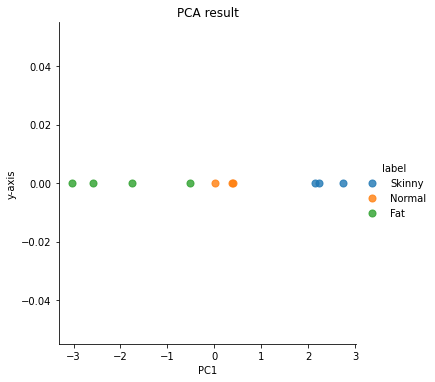

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.lmplot('PC1', 'y-axis', data = result, fit_reg = False,
          scatter_kws = {'s': 50}, hue = 'label')
plt.title('PCA result')

### scikit-learn을 활용해서 간단하게 구현하기

위에서는 수식을 직접 코드로 구현하여 주성분 알고리즘을 진행하였다.


하지만 사이킷런(scikit-learn)의 주성분 분석 라이브러리 모듈을 이용하면 쉽게 구현할 수 있다.


그 코드는 다음과 같다.

In [14]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 1)
sklearn_pca_x = pca.fit_transform(x_std)

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


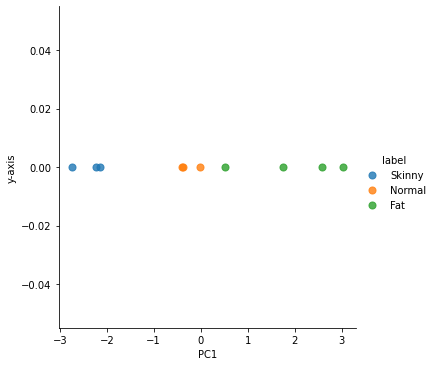

In [15]:
sklearn_result = pd.DataFrame(sklearn_pca_x, columns = ['PC1'])
sklearn_result['y-axis'] = 0
sklearn_result['label'] = Y

sns.lmplot('PC1', 'y-axis', data = sklearn_result, fit_reg = False,
          scatter_kws = {'s': 50}, hue = 'label')